# HomeWork 2

# Wine Tasting Machine

# Part 3

In [1]:
import pandas as pd
df=pd.read_csv('red_wine.csv')

In [2]:
df.head()

,citric acid,sulphates,alcohol,type
0,0.49,0.63,8.0,low
1,0.66,0.57,8.3,low
2,0.23,0.44,8.5,high
3,0.44,0.84,8.6,low
4,0.08,0.50,8.7,low


In [3]:
df.tail()

,citric acid,sulphates,alcohol,type
566,0.40,0.70,12.7,low
567,0.28,0.60,12.8,high
568,0.31,0.60,12.8,high
569,0.34,0.72,12.8,low
570,0.35,0.32,12.8,high


In [4]:
df.shape

(571, 4)

In [5]:
df.describe()

,citric acid,sulphates,alcohol
count,571.000000,571.000000,571.000000
mean,0.324676,0.588161,10.776883
std,0.175103,0.188478,1.092562
min,0.000000,0.250000,8.000000
25%,0.240000,0.450000,9.900000
50%,0.330000,0.570000,10.800000
75%,0.440000,0.710000,11.600000
max,1.000000,2.000000,12.800000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   citric acid  571 non-null    float64
 1   sulphates    571 non-null    float64
 2   alcohol      571 non-null    float64
 3   type         571 non-null    object 
dtypes: float64(3), object(1)
memory usage: 18.0+ KB


# Question-1

In [7]:
!pip install pandas-profiling

  Using cached visions-0.7.4-py3-none-any.whl (102 kB)
  Attempting uninstall: visions
    Found existing installation: visions 0.7.5
    Uninstalling visions-0.7.5:
      Successfully uninstalled visions-0.7.5


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.6.1 requires visions[type_image_path]==0.7.5, but you have visions 0.7.4 which is incompatible.


In [8]:
!pip install pandas ydata-profiling


  Using cached visions-0.7.5-py3-none-any.whl (102 kB)
  Attempting uninstall: visions
    Found existing installation: visions 0.7.4
    Uninstalling visions-0.7.4:
      Successfully uninstalled visions-0.7.4


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.7.5 which is incompatible.


In [9]:
import pandas as pd
from ydata_profiling import ProfileReport
df = pd.read_csv('red_wine.csv')
profile = ProfileReport(df)
profile




Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Question-2

In [10]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier

# Load the dataset
df = pd.read_csv('red_wine.csv')

# Separate features (X) and target (y)
X = df.drop('type', axis=1)
y = df['type']


In [11]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_auc_score, accuracy_score

# Load the dataset
df = pd.read_csv('red_wine.csv')

# Separate features (X) and target (y)
X = df.drop('type', axis=1)
y = df['type']

# Define the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Naïve Bayes': GaussianNB(),
    'Support Vector Machine': SVC(probability=True),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Baseline Majority Class': DummyClassifier(strategy='most_frequent'),
    'Baseline Random Classifier': DummyClassifier(strategy='uniform')
}

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'AUC'])

# Perform 10-fold cross-validation for each model and store the results in the DataFrame
for name, model in models.items():
    cv_accuracy = cross_val_score(model, X, y, cv=10, scoring='accuracy')
    cv_auc = cross_val_score(model, X, y, cv=10, scoring='roc_auc')
    
    results_df.loc[len(results_df)] = [name, cv_accuracy.mean(), cv_auc.mean()]

# Display the results
print(results_df)


                        Model  Accuracy       AUC
0         Logistic Regression  0.784785  0.879902
1                 Naïve Bayes  0.821627  0.895408
2      Support Vector Machine  0.535844  0.868920
3               Decision Tree  0.756776  0.756491
4               Random Forest  0.797157  0.885712
5     Baseline Majority Class  0.528887  0.500000
6  Baseline Random Classifier  0.483273  0.500000


# Question-3

In [12]:
%matplotlib inline

C:\Users\jaswa\Downloads\New folder\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\jaswa\Downloads\New folder\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\jaswa\Downloads\New folder\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\jaswa\Downloads\New folder\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pleas

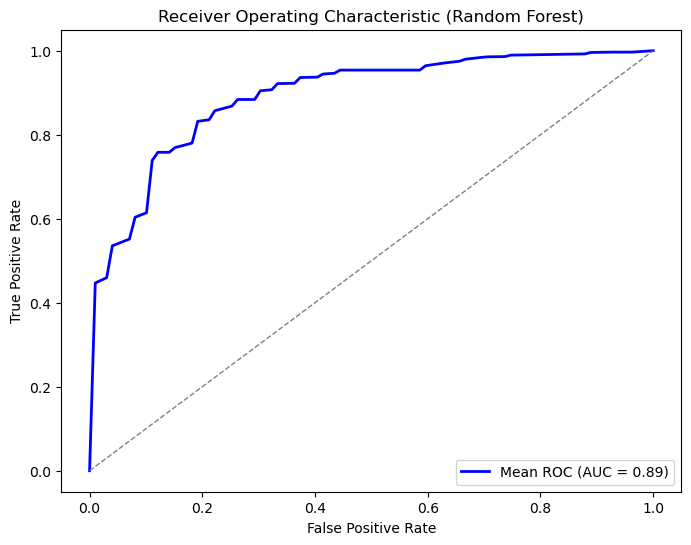

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
import numpy as np
from sklearn.preprocessing import label_binarize

# Define the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Initialize Stratified K-Fold cross-validator
cv = StratifiedKFold(n_splits=10)

# Initialize figure
plt.figure(figsize=(8, 6))

# Initialize lists to store true positive rates and area under curve values
mean_fpr = np.linspace(0, 1, 100)
tprs = []

# Convert 'type' to binary labels
y_binary = label_binarize(y, classes=['low', 'high'])

# Loop through each fold
for i, (train, test) in enumerate(cv.split(X, y)):
    probas_ = rf_classifier.fit(X.iloc[train], y_binary[train]).predict_proba(X.iloc[test])
    
    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_binary[test], probas_[:, 1])
    
    # Interpolate ROC curve at mean_fpr
    tpr_interp = np.interp(mean_fpr, fpr, tpr)
    tpr_interp[0] = 0.0
    tprs.append(tpr_interp)

# Compute and plot the mean ROC curve
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)

plt.plot(mean_fpr, mean_tpr, color='b', label=r'Mean ROC (AUC = %0.2f)' % mean_auc, lw=2)

# Plot the random classifier
plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Random Forest)')
plt.legend(loc='lower right')

# Show the plot
plt.show()


# Question-4

In [14]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_auc_score

# Load the dataset
df_white = pd.read_csv('white_wine.csv')  # Updated file name

# Separate features (X) and target (y)
X_white = df_white.drop('type', axis=1)
y_white = df_white['type']

# Define the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Naïve Bayes': GaussianNB(),
    'Support Vector Machine': SVC(probability=True),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Baseline Majority Class': DummyClassifier(strategy='most_frequent'),
    'Baseline Random Classifier': DummyClassifier(strategy='uniform')
}

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'AUC'])

# Perform 10-fold cross-validation for each model and store the results in the DataFrame
for name, model in models.items():
    cv_accuracy = cross_val_score(model, X, y, cv=10, scoring='accuracy')
    cv_auc = cross_val_score(model, X, y, cv=10, scoring='roc_auc')
    
    results_df.loc[len(results_df)] = [name, cv_accuracy.mean(), cv_auc.mean()]

# Find the best model based on AUC
best_model = results_df.loc[results_df['AUC'].idxmax()]['Model']

# Use the best model to evaluate white_wine.csv
X_white = df_white.drop('type', axis=1)
y_white = df_white['type']
best_model_classifier = models[best_model]
probas_white = best_model_classifier.fit(X, y).predict_proba(X_white)
auc_white = roc_auc_score(y_white, probas_white[:, 1])

# Print the AUC score for white_wine.csv
print(f"AUC score for {best_model} on white_wine.csv: {auc_white}")


AUC score for Naïve Bayes on white_wine.csv: 0.9488910318225652
